# Objetivo

  Realizar un análisis global de las publicaciones con descuentos en el sitio de MercadoLibre.
  Para esto, se debe ejecutar primero el archivo Recolección_de_datos.ipynb, el cual genera el dataset con la información que posteriormente será utilizada.

# Importaciones

In [132]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [133]:
%cd "drive/MyDrive/DataScienceChallengeMELI/Análisis"

[Errno 2] No such file or directory: 'drive/MyDrive/DataScienceChallengeMELI/Análisis'
/content/drive/MyDrive/DataScienceChallengeMELI/Análisis


In [134]:
!pip install import_ipynb

In [135]:
import numpy as np

import pandas as pd
pd.set_option('display.max_columns', 22) # Show all columns when looking at dataframe
pd.set_option('display.max_rows', 100) # Show all rows when looking at dataframe
pd.set_option('display.max_colwidth', 1000)

import matplotlib.pyplot as plt
import matplotlib as mlp
mlp.rcParams['figure.figsize'] = 12,8
import seaborn as sns 
sns.set_style('dark')


import import_ipynb
from funciones_aux import request_a_diccionario, devuelve_tipo_dato, cantidad_nulos

# Recolección de datos

Para la recolección y análisis de datos, se tiene en cuenta el sitio de Mercado Libre correspondiente a Argentina.

Cantidad de categorías presentes en el sitio

In [136]:
lista_categorias = request_a_diccionario("https://api.mercadolibre.com/sites/MLA/categories")

In [137]:
print("Hay un total de", len(lista_categorias), "categorías.")

Hay un total de 32 categorías.


Se trabajará con un dataset en donde los datos que lo conforman corresponden a Argentina y se cuenta con aproximadamente 1000 publicaciones por cada una de las categorías presentes en el sitio de MercadoLibre.

In [138]:
df_total = pd.read_csv("df_total_original.csv")

In [139]:
print("Cantidad total de productos:",df_total.shape[0])
print("Cantidad total de información perteneciente a cada producto:", df_total.shape[1])

Cantidad total de productos: 31789
Cantidad total de información perteneciente a cada producto: 22


In [140]:
df_total.head(2)

,id,site_id,title,price,currency_id,available_quantity,sold_quantity,buying_mode,listing_type_id,condition,accepts_mercadopago,address__state_name,address__city_name,shipping__free_shipping,shipping__store_pick_up,original_price,category_id,official_store_id,catalog_product_id,attributes__marca,attributes__modelo,categoria_principal
0,MLA909004508,MLA,"Estéreo Para Auto Electroland Orgt Con Usb, Bluetooth Y Lector De Tarjeta Sd",3899.00,ARS,254,5834,buy_it_now,gold_special,new,True,Capital Federal,Boedo,False,False,7603.05,MLA6867,NaN,MLA16999186,NaN,NaN,Accesorios para Vehículos
1,MLA636709517,MLA,Cubre Alfombra Goma Pesada Universal 3 Piezas Auto Camioneta,2159.99,ARS,1,5000,buy_it_now,gold_special,new,True,Buenos Aires,Ciudadela,False,False,NaN,MLA2219,NaN,NaN,At,Cubre alfombra,Accesorios para Vehículos


Se seleccionarán las variables que a criterio propio se consideran importantes para llevar a cabo el análisis global.

In [141]:
variables_seleccionadas = ['price','available_quantity', 'sold_quantity', 'buying_mode',
                           'condition', 'accepts_mercadopago', 'address__state_name',
                           'shipping__free_shipping', 'shipping__store_pick_up',
                           'original_price', 'categoria_principal']

In [142]:
df_total = df_total[variables_seleccionadas]
df_total.head(2)

,price,available_quantity,sold_quantity,buying_mode,condition,accepts_mercadopago,address__state_name,shipping__free_shipping,shipping__store_pick_up,original_price,categoria_principal
0,3899.00,254,5834,buy_it_now,new,True,Capital Federal,False,False,7603.05,Accesorios para Vehículos
1,2159.99,1,5000,buy_it_now,new,True,Buenos Aires,False,False,NaN,Accesorios para Vehículos


# Análisis y procesamiento de variables

Variable| Tipo |
---|---|
price| numérica
available_quantity| categórica
sold_quantity| categórica
buying_mode| categórica
condition| categórica
accepts_mercapago| categórica
address__state_name| categórica
shipping__free_shipping| categórica
shipping__stores_pick_up| categórica
original_price| numérica
categoría_principal| categórica

Para cada una de las variables seleccionadas, se realizará:


*   Descripción de la variable
*   Tipo de dato (entero, flotante, booleano, otros)
*   Análisis de valores nulos
*   Distribución de la variable






## Variable: price

In [143]:
variable = 'price'

### Descripción

Se trata de una variable numérica, en donde si la pubicación presenta descuento este valor es el precio con descuento de la misma, mientras que si la publicación no tiene descuento, este campo es el precio de la publicación.

### Tipo de dato

In [144]:
devuelve_tipo_dato(df_total[variable], variable)

La variable price es un dato flotante.


### Análisis de valores nulos

In [145]:
cantidad_nulos(df_total[variable], variable)

La variable price tiene 303 datos nulos registrados que representan el 0.95 % del total de datos.


Como se requiere que la publicación tenga el precio para realizar el análisis y, como los datos faltantes representan menos del 1% del total de datos, se eliminarán dichos registros.

In [146]:
df_total = df_total.dropna(subset = [variable])

### Distribución

Información de la distribución de precios para productos con y sin descuento.

In [147]:
df_total[variable].describe()

count    3.148600e+04
mean     1.493449e+05
std      9.424401e+05
min      1.000000e+00
25%      1.520000e+03
50%      4.399000e+03
75%      1.479900e+04
max      3.623000e+07
Name: price, dtype: float64

Se puede ver que los precios varían enormemente ya que en el sitio de MercadoLibre se puede encontrar desde accesorios hasta inmuebles y vehículos.

## Variable: available_quantity

In [148]:
variable = 'available_quantity'

### Descripción

Se trata de una variable categórica que representa la cantidad disponible de ejemplares de un determinado producto.

### Tipo de dato

In [149]:
devuelve_tipo_dato(df_total[variable], variable)

La variable available_quantity es un dato entero.


### Análisis de valores nulos

In [150]:
cantidad_nulos(df_total[variable], variable)

La variable available_quantity tiene 0 datos nulos registrados que representan el 0.0 % del total de datos.


### Distribución

Recuento de las publicaciones para determinadas cantidades de disponibilidad de ejemplares, expresado en porcentaje, en donde la primera columna corresponde a la disponibilidad. Se tienen en cuenta rangos de disponibilidad.

In [151]:
round(((df_total[variable].value_counts(normalize = True))*100).head(10).sort_index(), 3)

1       44.658
2        2.274
3        1.690
50       7.521
100      3.332
150      2.309
200      1.521
250      4.612
500      7.311
5000     1.944
Name: available_quantity, dtype: float64

Recuento de las publicaciones para determinadas cantidades de disponibilidad de ejemplares, en donde la primera columna corresponde a la disponibilidad. Se tienen en cuenta rangos de disponibilidad.

In [152]:
df_total[variable].value_counts().head(10).sort_index()

1       14061
2         716
3         532
50       2368
100      1049
150       727
200       479
250      1452
500      2302
5000      612
Name: available_quantity, dtype: int64

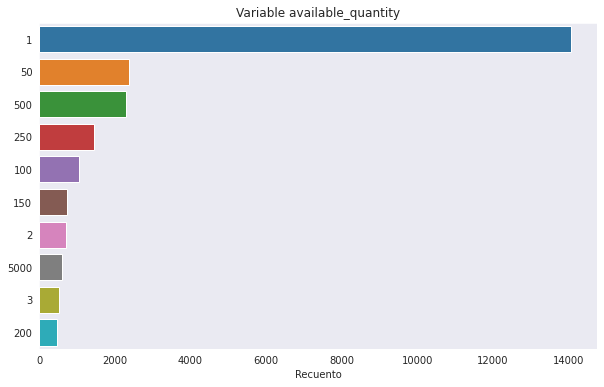

In [153]:
plt.figure(figsize = (10, 6))
plt.title('Variable available_quantity')
sns.countplot(y = df_total[variable], order = (df_total[variable].value_counts().head(10)).index)
plt.xlabel("Recuento", fontsize = 10)
plt.ylabel("")
plt.show()


## Variable: sold_quantity

In [154]:
variable = 'sold_quantity'

### Descripción

Se trata de una variable categórica que representa la cantidad de ejemplares vendidos de una determinada publicación.

### Tipo de dato

In [155]:
devuelve_tipo_dato(df_total[variable], variable)

La variable sold_quantity es un dato entero.


### Análisis de valores nulos

In [156]:
cantidad_nulos(df_total[variable], variable)

La variable sold_quantity tiene 0 datos nulos registrados que representan el 0.0 % del total de datos.


### Distribución

Recuento de las publicaciones para determinada cantidad de ejemplares vendidos, expresado en porcentaje, en donde la primera columna corresponde a la venta histórica. Se tienen en cuenta rangos de ventas.

In [157]:
round(((df_total[variable].value_counts(normalize = True))*100).head(10).sort_index(), 3)

0       11.215
5        5.949
25       3.875
50       5.771
100      4.202
150      3.224
200      2.728
250      8.918
500     21.003
5000     3.112
Name: sold_quantity, dtype: float64

Recuento de las publicaciones para determinada cantidad de ejemplares vendidos, en donde la primera columna corresponde a la venta histórica. Se tienen en cuenta rangos de ventas.

In [158]:
df_total[variable].value_counts().head(10).sort_index()

0       3531
5       1873
25      1220
50      1817
100     1323
150     1015
200      859
250     2808
500     6613
5000     980
Name: sold_quantity, dtype: int64

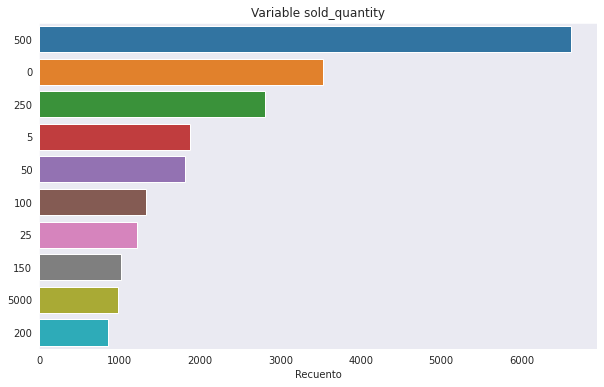

In [159]:
plt.figure(figsize = (10, 6))
plt.title('Variable sold_quantity')
sns.countplot(y = df_total[variable], order = (df_total[variable].value_counts().head(10)).index)
plt.xlabel("Recuento", fontsize = 10)
plt.ylabel("")
plt.show()

## Variable: buying_mode

In [160]:
variable = 'buying_mode'

### Descripción

Se trata de una variable categórica que representa el modo en que puede comprarse un determinado producto.

### Tipo de dato

In [161]:
devuelve_tipo_dato(df_total[variable], variable)

La variable buying_mode es un dato objeto.


### Análisis de valores nulos

In [162]:
cantidad_nulos(df_total[variable], variable)

La variable buying_mode tiene 0 datos nulos registrados que representan el 0.0 % del total de datos.


### Distribución

Recuento de las publicaciones para los distintos modos de compra que admite la plataforma expresado en porcentaje.

In [163]:
round(((df_total[variable].value_counts(normalize = True))*100), 3)

buy_it_now    91.457
classified     8.543
Name: buying_mode, dtype: float64

Recuento de las publicaciones para los distintos modos de compra que admite la plataforma.

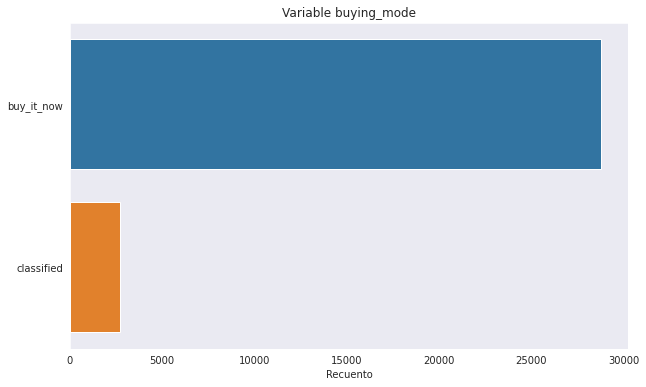

In [164]:
plt.figure(figsize = (10, 6))
plt.title('Variable buying_mode')
sns.countplot(y = df_total[variable], order = (df_total[variable].value_counts()).index)
plt.xlabel("Recuento", fontsize = 10)
plt.ylabel("")
plt.show()

## Variable: condition

In [165]:
variable = 'condition'

### Descripción

Se trata de una variable categórica que indica el estado de uso del ítem en cuestión.

### Tipo de dato

In [166]:
devuelve_tipo_dato(df_total[variable], variable)

La variable condition es un dato objeto.


### Análisis de valores nulos

In [167]:
cantidad_nulos(df_total[variable], variable)

La variable condition tiene 697 datos nulos registrados que representan el 2.21 % del total de datos.


### Distribución

Recuento de las publicaciones correspondientes a los distintos estados de uso presentes en el dataset, expresado en porcentaje.

In [168]:
round(((df_total[variable].value_counts(normalize = True, dropna = False))*100).sort_index(), 3)

new              91.920
not_specified     0.156
used              5.710
NaN               2.214
Name: condition, dtype: float64

Se considera que a los fines practicos los valores nulos pueden considerarse como una condición no especificada por lo que se agrupan en dicha categoría ya presente. Se tendrá en cuenta para el análisis la condición de nuevo y usado, los cuales se consideran que pueden aportar información útil.

In [169]:
df_total[variable].fillna(value = 'not_specified', inplace = True)

Recuento de las publicaciones correspondientes a los distintos estados de uso presentes en el dataset.

In [170]:
df_total[variable].value_counts(dropna = False)

new              28942
used              1798
not_specified      746
Name: condition, dtype: int64

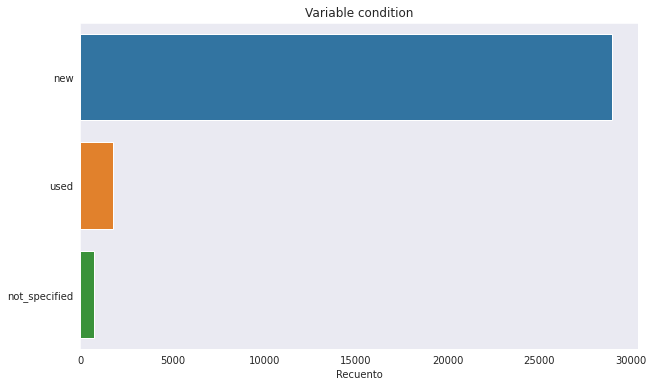

In [171]:
plt.figure(figsize = (10, 6))
plt.title('Variable condition')
sns.countplot(y = df_total[variable], order = (df_total[variable].value_counts(dropna = False)).index)
plt.xlabel("Recuento", fontsize = 10)
plt.ylabel("")
plt.show()

## Variable: accepts_mercadopago

In [172]:
variable = 'accepts_mercadopago'

### Descripción

Se trata de una variable categórica que indica si la publicación acepta o no mercadopago, para lo cual los valores que admite son: True si acepta, False si no acepta.

### Tipo de dato

In [173]:
devuelve_tipo_dato(df_total[variable], variable)

La variable accepts_mercadopago es un dato booleano.


### Análisis de valores nulos

In [174]:
cantidad_nulos(df_total[variable], variable)

La variable accepts_mercadopago tiene 0 datos nulos registrados que representan el 0.0 % del total de datos.


### Distribución

Recuento de las publicaciones que aceptan o no mercadopago, expresado en porcentaje.

In [175]:
round(((df_total[variable].value_counts(normalize = True, dropna = False))*100), 3)

True     96.824
False     3.176
Name: accepts_mercadopago, dtype: float64

Se reemplazarán los valores booleanos por 1s y 0s para indicar si acepta mercadopago, se le asigna un 1 y si no, se le asigna un 0.

In [176]:
df_total[variable] = df_total[variable].replace([True, False], [1, 0])

Recuento de las publicaciones que aceptan o no mercadopago.

In [177]:
df_total[variable].value_counts(dropna = False)

1    30486
0     1000
Name: accepts_mercadopago, dtype: int64

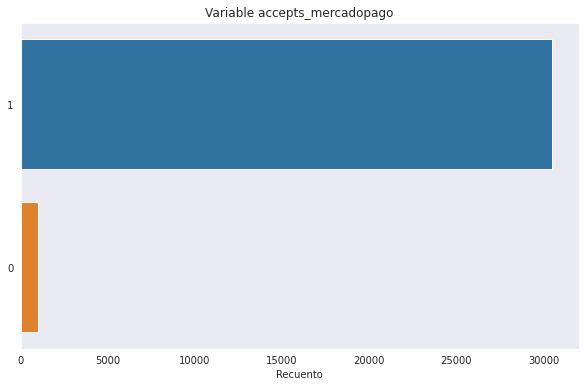

In [178]:
plt.figure(figsize = (10, 6))
plt.title('Variable accepts_mercadopago')
sns.countplot(y = df_total[variable], order = (df_total[variable].value_counts()).index)
plt.xlabel("Recuento", fontsize = 10)
plt.ylabel("")
plt.show()

## Variable: address__state_name

In [179]:
variable = 'address__state_name'

### Descripción

Se trata de una variable categórica que representa la zona de la publicación.

### Tipo de dato

In [180]:
devuelve_tipo_dato(df_total[variable], variable)

La variable address__state_name es un dato objeto.


### Análisis de valores nulos

In [181]:
cantidad_nulos(df_total[variable], variable)

La variable address__state_name tiene 0 datos nulos registrados que representan el 0.0 % del total de datos.


### Distribución

Recuento de las publicaciones por zona, expresado en porcentaje.

In [182]:
round(((df_total[variable].value_counts(normalize = True))*100), 3)

Capital Federal           57.676
Buenos Aires              31.751
Santa Fe                   2.855
Córdoba                    2.325
Bs.As. G.B.A. Norte        1.775
Bs.As. G.B.A. Sur          0.858
Bs.As. G.B.A. Oeste        0.594
Bs.As. Costa Atlántica     0.333
Entre Ríos                 0.299
Mendoza                    0.279
Misiones                   0.194
Tucumán                    0.168
Chubut                     0.140
Río Negro                  0.133
Buenos Aires Interior      0.127
Santa Cruz                 0.121
Chaco                      0.064
Corrientes                 0.057
Neuquén                    0.044
La Pampa                   0.041
Salta                      0.038
La Rioja                   0.032
San Juan                   0.025
Jujuy                      0.022
San Luis                   0.016
Santiago del Estero        0.013
Uruguay                    0.010
Formosa                    0.006
Catamarca                  0.003
Name: address__state_name, dtype: float64

Se renombrará Buenos Aires Interior por Buenos Aires y se eliminará Uruguay ya que, se analizan solo datos correspondientes a Argentina.

In [183]:
df_total['address__state_name'] = df_total['address__state_name'].replace('Buenos Aires Interior', 'Buenos Aires')

In [184]:
df_total = df_total.drop(df_total[df_total['address__state_name'] == 'Uruguay'].index)

Recuento de las publicaciones por zona.

In [185]:
df_total[variable].value_counts()

Capital Federal           18160
Buenos Aires              10037
Santa Fe                    899
Córdoba                     732
Bs.As. G.B.A. Norte         559
Bs.As. G.B.A. Sur           270
Bs.As. G.B.A. Oeste         187
Bs.As. Costa Atlántica      105
Entre Ríos                   94
Mendoza                      88
Misiones                     61
Tucumán                      53
Chubut                       44
Río Negro                    42
Santa Cruz                   38
Chaco                        20
Corrientes                   18
Neuquén                      14
La Pampa                     13
Salta                        12
La Rioja                     10
San Juan                      8
Jujuy                         7
San Luis                      5
Santiago del Estero           4
Formosa                       2
Catamarca                     1
Name: address__state_name, dtype: int64

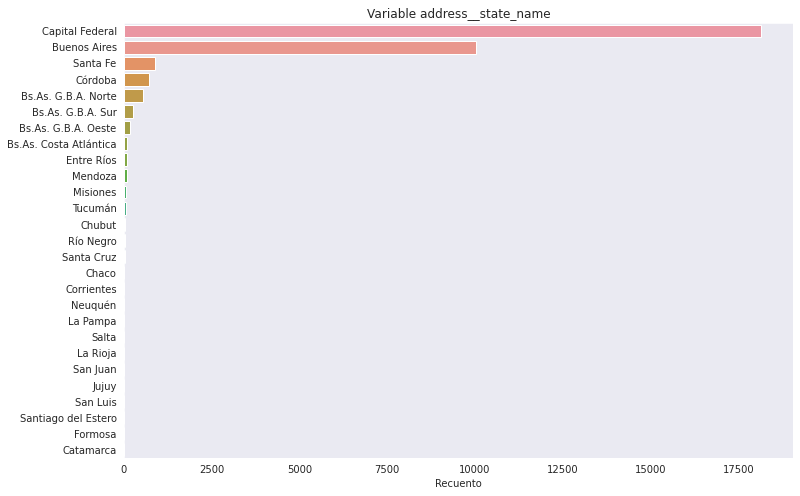

In [186]:
plt.title('Variable address__state_name')
sns.countplot(y = df_total[variable], order = (df_total[variable].value_counts()).index)
plt.xlabel("Recuento", fontsize = 10)
plt.ylabel("")
plt.show()

## Variable: shipping__free_shipping

In [187]:
variable = 'shipping__free_shipping'

### Descripción

Se trata de una variable categórica que indica si el envío del producto es o no gratuito, tomando valores de True si es gratuito y False, en caso contrario.

### Tipo de dato

In [188]:
devuelve_tipo_dato(df_total[variable], variable)

La variable shipping__free_shipping es un dato booleano.


### Análisis de valores nulos

In [189]:
cantidad_nulos(df_total[variable], variable)

La variable shipping__free_shipping tiene 0 datos nulos registrados que representan el 0.0 % del total de datos.


### Distribución

Recuento de las publicaciones que presentan y no el envío gratis, expresado en porcentaje.

In [190]:
round(((df_total[variable].value_counts(normalize = True))*100), 3)

False    56.583
True     43.417
Name: shipping__free_shipping, dtype: float64

Se reemplazarán los valores booleanos por 1s y 0s, en donde 1 representa el envío gratis y 0 el caso contrario.

In [191]:
df_total[variable].replace([True, False], [1, 0], inplace = True)

Recuento de los productos que aceptan y no el envío gratis.

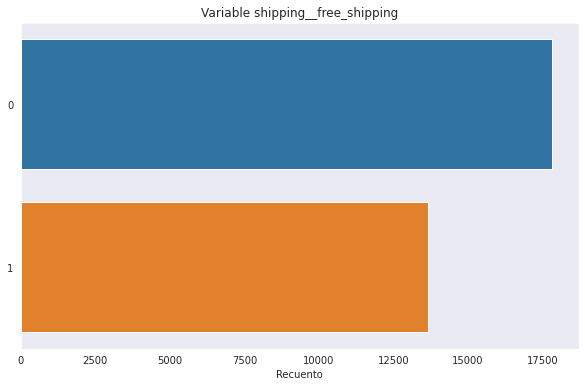

In [192]:
plt.figure(figsize = (10, 6))
plt.title('Variable shipping__free_shipping')
sns.countplot(y = df_total[variable], order = (df_total[variable].value_counts()).index)
plt.xlabel("Recuento", fontsize = 10)
plt.ylabel("")
plt.show()

## Variable: shipping__store_pick_up

In [193]:
variable = 'shipping__store_pick_up'

### Descripción

Se trata de una variable categórica que indica si el producto se retira o no en el local, tomando valores de True, si se retira por local o False para el caso contrario.

### Tipo de dato

In [194]:
devuelve_tipo_dato(df_total[variable], variable)

La variable shipping__store_pick_up es un dato booleano.


### Análisis de valores nulos

In [195]:
cantidad_nulos(df_total[variable], variable)

La variable shipping__store_pick_up tiene 0 datos nulos registrados que representan el 0.0 % del total de datos.


### Distribución

Recuento de las publicaciones que se retiran en el local y los que no, expresado en porcentaje.

In [196]:
round(((df_total[variable].value_counts(normalize = True))*100), 3)

False    96.963
True      3.037
Name: shipping__store_pick_up, dtype: float64

Se reemplazarán los valores booleanos por 1s y 0s para indicar si se retira en local o si no, respectivamente.

In [197]:
df_total[variable].replace([True, False], [1, 0], inplace = True)

Recuento de las publicaciones que se retiran en el local y las que no.

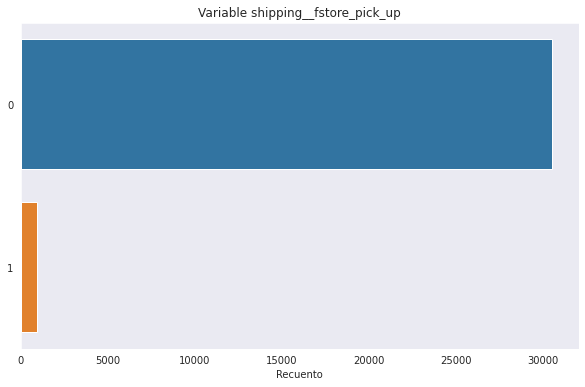

In [198]:
plt.figure(figsize = (10, 6))
plt.title('Variable shipping__fstore_pick_up')
sns.countplot(y = df_total[variable], order = (df_total[variable].value_counts()).index)
plt.xlabel("Recuento", fontsize = 10)
plt.ylabel("")
plt.show()

## Variable: original_price

In [199]:
variable = 'original_price'

### Descripción

Se trata de una variable numérica que representa si un producto tiene o no descuento. Si este campo no es nulo, este valor representa el precio sin descuento. En cambio, si este campo es nulo, el producto no tiene descuento.

### Tipo de dato

In [200]:
devuelve_tipo_dato(df_total[variable], variable)

La variable original_price es un dato flotante.


### Análisis de valores nulos

In [201]:
cantidad_nulos(df_total[variable], variable)

La variable original_price tiene 27627 datos nulos registrados que representan el 87.75 % del total de datos.


### Distribución

Información estadística de los productos con descuento.

In [202]:
df_total[variable].describe()

count      3856.000000
mean      17394.526538
std       38173.051312
min          30.000000
25%        1999.000000
50%        5339.500000
75%       14999.000000
max      492299.000000
Name: original_price, dtype: float64

Se puede observar que hay una gran diferencia de precios entre los productos ya que, en la plataforma se encuentran desde accesorios cuyo precio es sustancialmente menor comparado con el precio de un inmueble o un vehículo.

## Variable: categoria_principal

In [203]:
variable = 'categoria_principal'

### Descripción

Se trata de una variable categórica que representa la categoría dentro del sitio de MercadoLibre a la cual pertenece la publicación.

### Tipo de dato

In [204]:
devuelve_tipo_dato(df_total[variable], variable)

La variable categoria_principal es un dato objeto.


### Análisis de valores nulos

In [205]:
cantidad_nulos(df_total[variable], variable)

La variable categoria_principal tiene 0 datos nulos registrados que representan el 0.0 % del total de datos.


### Distribución

Recuento de las publicaciones pertenecientes a las distintas categorías disponibles, expresado en porcentaje.

In [206]:
round(((df_total[variable].value_counts(normalize = True))*100), 3)

Joyas y Relojes                  3.176
Alimentos y Bebidas              3.176
Música, Películas y Series       3.176
Antigüedades y Colecciones       3.176
Arte, Librería y Mercería        3.176
Industrias y Oficinas            3.176
Souvenirs, Cotillón y Fiestas    3.176
Entradas para Eventos            3.176
Construcción                     3.173
Agro                             3.173
Cámaras y Accesorios             3.173
Bebés                            3.173
Computación                      3.170
Inmuebles                        3.167
Juegos y Juguetes                3.167
Instrumentos Musicales           3.164
Deportes y Fitness               3.164
Salud y Equipamiento Médico      3.164
Consolas y Videojuegos           3.164
Belleza y Cuidado Personal       3.164
Ropa y Accesorios                3.157
Electrónica, Audio y Video       3.157
Herramientas                     3.154
Electrodomésticos y Aires Ac.    3.154
Autos, Motos y Otros             3.154
Animales y Mascotas      

Recuento de las publicaciones pertenecientes a las distintas categorías disponibles.

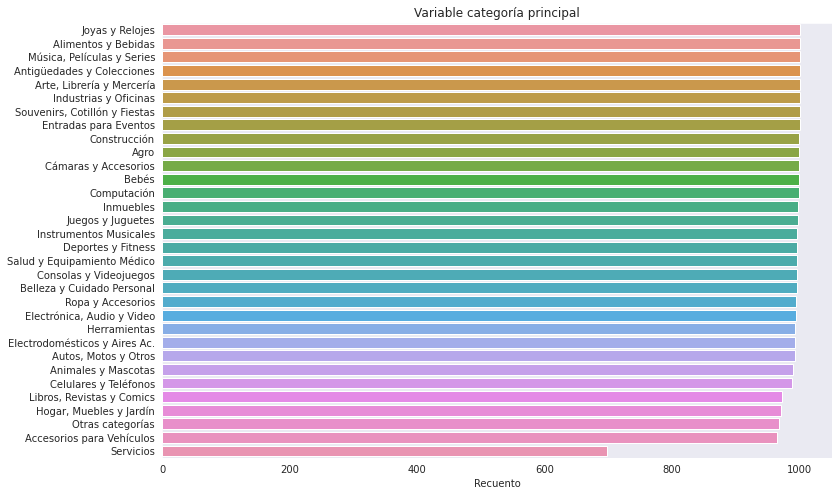

In [207]:
plt.title('Variable categoría principal')
sns.countplot(y = df_total[variable], order = (df_total[variable].value_counts()).index)
plt.xlabel("Recuento", fontsize = 10)
plt.ylabel("")
plt.show()

Se puede observar que la cantidad de publicaciones por categoría es muy similar ya que, se recolectaron aproximadamente 1000 publicaciones por categoría disponible.

# Creación de variables

## Variable: tiene_descuento

Se generará la variable tiene_descuento en donde los valores que tomará serán 1, si la publicación tiene descuento o, 0, si no tiene descuento.

In [208]:
df_total["tiene_descuento"] = df_total["original_price"].notna()
df_total = df_total.astype({"tiene_descuento": "int"})

## Variable: precio_sin_dcto

Se generará la variable precio_sin_dcto en donde si el ítem presenta descuento, dicha variable será el precio sin descuento del ítem, mientras que si el ítem no presenta descuento, el valor de la misma será el precio del ítem.

In [209]:
conditions = [
               df_total['tiene_descuento'] == 0,
               df_total['tiene_descuento'] == 1 
             ]

outputs = [df_total['price'], df_total['original_price']]

In [210]:
df_total['precio_sin_dcto'] = pd.Series(np.select(conditions, outputs))


## Variable: precio_con_dcto

Se generará la variable precio_con_dcto en donde si el ítem tiene descuento, el valor que tomará es el prcio con descuentos mientras que si el ítem no tiene descuento, el valor será el precio del ítem.

In [211]:
conditions = [
               df_total['tiene_descuento'] == 0,
               df_total['tiene_descuento'] == 1 
             ]

outputs = [df_total['price'], df_total['price']]

In [212]:
df_total['precio_con_dcto'] = pd.Series(np.select(conditions, outputs))


In [213]:
df_total.head(2)

,price,available_quantity,sold_quantity,buying_mode,condition,accepts_mercadopago,address__state_name,shipping__free_shipping,shipping__store_pick_up,original_price,categoria_principal,tiene_descuento,precio_sin_dcto,precio_con_dcto
0,3899.00,254,5834,buy_it_now,new,1,Capital Federal,0,0,7603.05,Accesorios para Vehículos,1,7603.05,3899.00
1,2159.99,1,5000,buy_it_now,new,1,Buenos Aires,0,0,NaN,Accesorios para Vehículos,0,2159.99,2159.99


## Variable: dcto_porcentual

Para calcular el descuento porcentual de un ítem se utilizará la siguiente fórmula:

***descuento porcentual = ((precio sin descuento - precio con descuento)/precio sin descuento) x100***


In [214]:
conditions = [
               df_total['tiene_descuento'] == 0,
               df_total['tiene_descuento'] == 1 
             ]

outputs = [0, ((df_total['precio_sin_dcto'] - df_total['precio_con_dcto']) / df_total['precio_sin_dcto']) * 100]

In [215]:
df_total['dcto_porcentual'] = pd.Series(np.select(conditions, outputs))


# Análisis del dataset

En esta sección, se darán respuestas a preguntas que fueron surgiendo y que se consideran de interés para conocer un poco mejor el dataset.

## ¿Hay alguna relación entre las publicaciones con descuento y la categoría?

Primero, se determinará el porcentaje de las publicaciones con descuento.

In [292]:
variable = 'original_price'

In [293]:
nulos = df_total[variable].isnull().sum()
porcentaje_sin_dcto = round(nulos / len(df_total[variable]) * 100, 2)

In [294]:
porcentaje_con_dcto = 100 - porcentaje_sin_dcto

In [296]:
porcentaje_de_dcto = pd.DataFrame({"porcentaje": [porcentaje_sin_dcto, porcentaje_con_dcto]},
                    index = ['sin descuento', 'con descuento'])

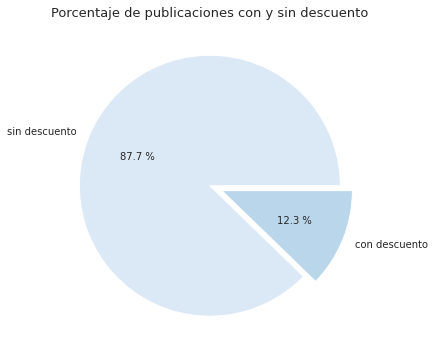

In [299]:
plt.figure(figsize = (8, 6))
colors = sns.color_palette('Blues')
porcentaje_de_dcto.porcentaje.plot.pie(autopct = "%0.1f %%", explode = (0, 0.1), colors = colors)
plt.title(u"Porcentaje de publicaciones con y sin descuento", fontsize = 13)
plt.ylabel("")
plt.show()

Como es de esperar, la cantidad de publicaciones con descuento es sustancialmente menor, apenas sobrepasa el 10% del total de datos recolectados.

Se determinará si los descuentos se concentran en alguna/s categoría/s en particular.

In [265]:
df_aux = df_total.groupby(by = 'categoria_principal')['tiene_descuento'].mean() * 100
df_aux = pd.DataFrame(df_aux).reset_index()
df_aux.rename(columns = {'categoria_principal':'categorias',
                         'tiene_descuento':'porcentaje'}, inplace = True)

In [266]:
df_aux = df_aux.sort_values(by = 'porcentaje', ascending = False)

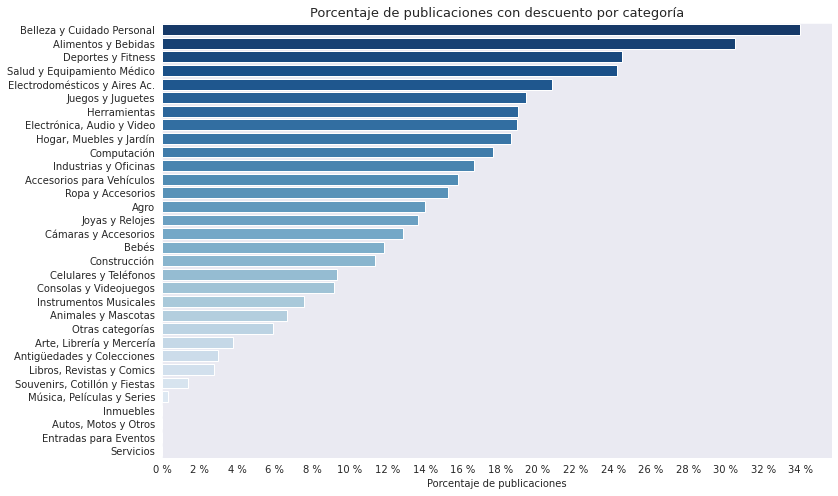

In [268]:
sns.barplot(data = df_aux, x = "porcentaje", y = "categorias", orient = "h", palette = 'Blues_r')

xticks = np.arange(0, 35, 2)
plt.xticks(xticks, [str(int(item)) + " %" for item in xticks])

plt.title(u"Porcentaje de publicaciones con descuento por categoría", fontsize = 13)
plt.xlabel("Porcentaje de publicaciones", fontsize = 10)
plt.ylabel("")
plt.show()

Se puede ver que la mayor cantidad de publicaciones con descuentos se encuentran en las categorías de Belleza y Cuidado Personal y Alimentos y Bebidas. Por otro lado, las categorías de Inmuebles; Autos, Motos y Otros; Entradas para Eventos y Servicios no presentan descuentos.

## ¿Cuál es el descuento promedio porcentual en las distintas categorías del MarketPlace?

In [279]:
df_total.groupby('categoria_principal')['dcto_porcentual'].mean().sort_values(ascending = False)

categoria_principal
Belleza y Cuidado Personal       7.932351
Alimentos y Bebidas              5.139593
Deportes y Fitness               4.711624
Hogar, Muebles y Jardín          4.527706
Electrónica, Audio y Video       3.764036
Herramientas                     3.747676
Electrodomésticos y Aires Ac.    3.694049
Industrias y Oficinas            3.336717
Cámaras y Accesorios             2.888280
Construcción                     2.688393
Computación                      2.626636
Accesorios para Vehículos        2.255672
Bebés                            2.183494
Agro                             1.926900
Consolas y Videojuegos           1.623949
Salud y Equipamiento Médico      1.290798
Celulares y Teléfonos            1.111077
Animales y Mascotas              0.706087
Juegos y Juguetes                0.688388
Arte, Librería y Mercería        0.459703
Joyas y Relojes                  0.458538
Ropa y Accesorios                0.355111
Instrumentos Musicales           0.213649
Antigüedades y

In [280]:
df_aux = df_total.groupby(by = 'categoria_principal')['dcto_porcentual'].mean() 
df_aux = pd.DataFrame(df_aux).reset_index()
df_aux.rename(columns = {'categoria_principal':'categorias',
                         'dcto_porcentual':'porcentaje'}, inplace = True)

In [281]:
df_aux = df_aux.sort_values(by = 'porcentaje', ascending = False)

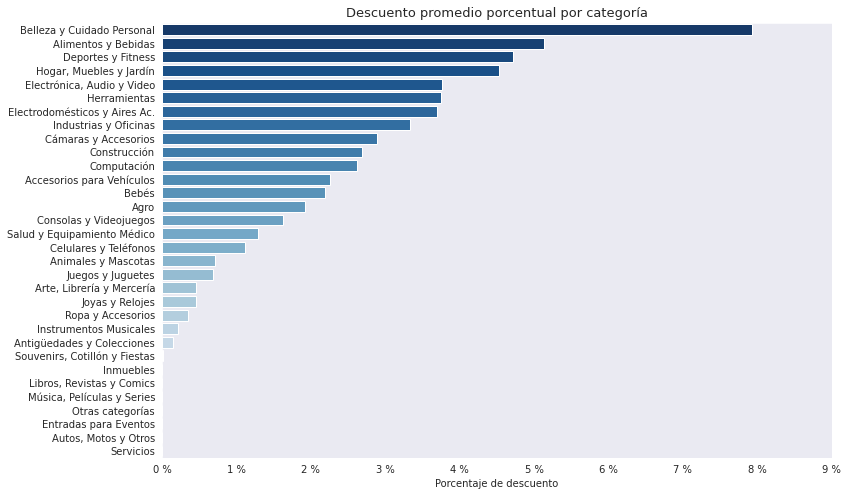

In [283]:
sns.barplot(data = df_aux, x = "porcentaje", y = "categorias", orient = "h", palette = 'Blues_r')

xticks = np.arange(0, 10, 1)
plt.xticks(xticks, [str(int(item)) + " %" for item in xticks])

plt.title(u"Descuento promedio porcentual por categoría", fontsize = 13)
plt.xlabel("Porcentaje de descuento", fontsize = 10)
plt.ylabel("")
plt.show()

Se puede ver que las tres primeras categorías no solo presentan un recuento mayor de publicaciones con descuento sino que también el porcentaje promedio de dichos descuentos es mayor. Lo contrario ocurre con la categoría de Salud y Equipamiento Médico, la misma se encuentra en el top 5 en cuanto a la cantidad de publicaciones con descuento pero al ver el porcentaje promedio de descuento, el mismo es bajo comparado con las 4 primeras posiciones.

## ¿Cómo se distribuyen los descuentos según la zona geográfica?

In [284]:
df_aux = df_total.groupby(by = 'address__state_name')['tiene_descuento'].mean() * 100
df_aux = pd.DataFrame(df_aux).reset_index()
df_aux.rename(columns = {'address__state_name':'zona',
                         'tiene_descuento':'porcentaje'}, inplace = True)

In [285]:
df_aux = df_aux.sort_values(by = 'porcentaje', ascending = False)

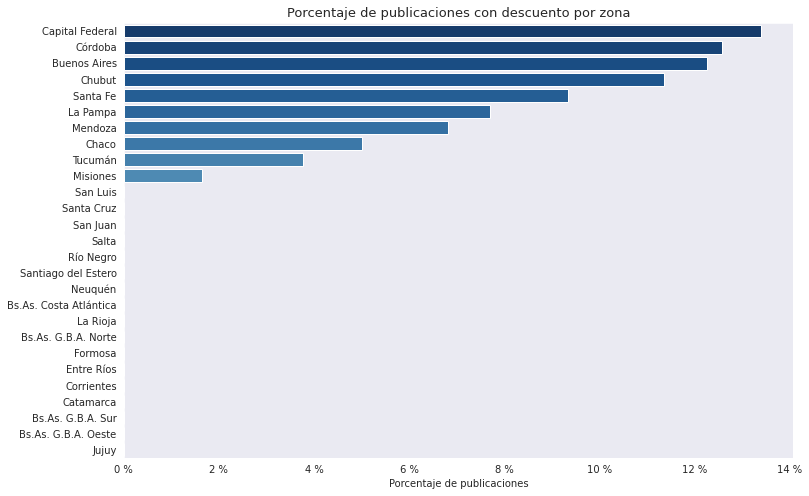

In [286]:
sns.barplot(data = df_aux, x = "porcentaje", y = "zona", orient = "h", palette = 'Blues_r')

xticks = np.arange(0, 15, 2)
plt.xticks(xticks, [str(int(item)) + " %" for item in xticks])

plt.title(u"Porcentaje de publicaciones con descuento por zona", fontsize = 13)
plt.xlabel("Porcentaje de publicaciones", fontsize = 10)
plt.ylabel("")
plt.show()

Como puede verse en el gráfico, varias zonas no presentan publicaciones con descuento y es lógico pensar que es debido a la etapa de la recolección de datos.
Teniendo en cuenta que la cantidad de datos recolectados no es suficiente ya que, el porcentaje de publicaciones con descuentos supera ligeramente el 10% del total de datos, no se puede concluir que haya una concentración importante de descuentos en determinada zona geográfica o dicho de otra forma que la zona tenga algún tipo de influencia en las publicaciones con descuento. 

## ¿Hay alguna relación entre las publicaciones con descuento y la condición de uso?

In [228]:
df_aux = df_total.groupby(by = 'condition')['tiene_descuento'].mean() * 100
df_aux = pd.DataFrame(df_aux).reset_index()
df_aux.rename(columns = {'condition':'condición',
                         'tiene_descuento':'porcentaje'}, inplace = True)
df_aux.replace({'new':"nuevo", 'used':"usado", "not_specified":"no especificado"}, inplace = True)

In [229]:
df_aux = df_aux.sort_values(by = 'porcentaje', ascending = False)

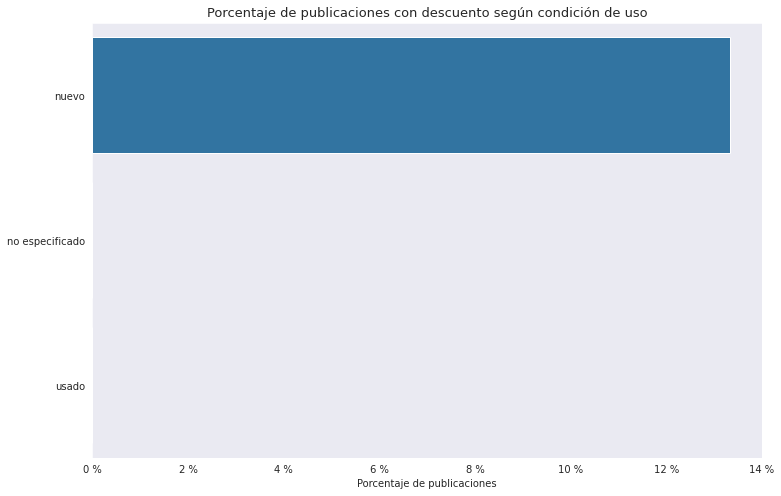

In [230]:
sns.barplot(data = df_aux, x = "porcentaje", y = "condición", orient = "h")

xticks = np.arange(0, 15, 2)
plt.xticks(xticks, [str(int(item)) + " %" for item in xticks])

plt.title(u"Porcentaje de publicaciones con descuento según condición de uso", fontsize = 13)
plt.xlabel("Porcentaje de publicaciones", fontsize = 10)
plt.ylabel("")
plt.show()

Como puede observarse en el gráfico los descuentos se concentran en los ítems nuevos, contrario a lo que se imaginaba. Se pensaba que los ítems usados presentarían un mayor porcentaje de descuento ya que, por su condición, el vendedor para fomentar la compra, aplicaría algún tipo de descuento. Estos datos claramente no son para nada concluyentes ya que, debería corroborarse analizando un dataset con un volumen de información bastante mayor al que se está utilizando.

## ¿Hay alguna relación entre el modo de compra y las publicaciones con descuento?

In [231]:
df_aux = df_total.groupby(by = 'buying_mode')['tiene_descuento'].mean() * 100
df_aux = pd.DataFrame(df_aux).reset_index()
df_aux.rename(columns = {'buying_mode':'modo de compra',
                         'tiene_descuento':'porcentaje'}, inplace = True)
df_aux.replace({'buy_it_now':"compra inmediata", 'classified':"clasificado"}, inplace = True)

In [232]:
df_aux = df_aux.sort_values(by = 'porcentaje', ascending = False)

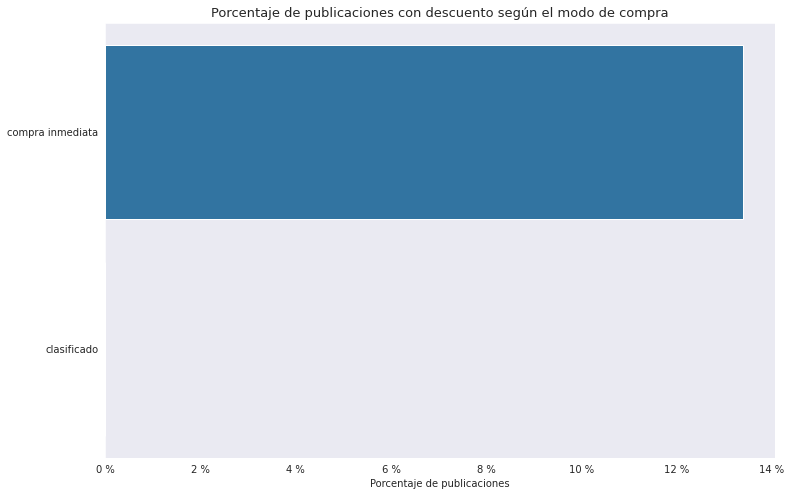

In [233]:
sns.barplot(data = df_aux, x = "porcentaje", y = "modo de compra", orient = "h")

xticks = np.arange(0, 15, 2)
plt.xticks(xticks, [str(int(item)) + " %" for item in xticks])

plt.title(u"Porcentaje de publicaciones con descuento según el modo de compra", fontsize = 13)
plt.xlabel("Porcentaje de publicaciones", fontsize = 10)
plt.ylabel("")
plt.show()

In [234]:
print("Categorías que incluyen buying_mode = 'classified':")
df_total[df_total["buying_mode"] == "classified"]["categoria_principal"].value_counts()

Categorías que incluyen buying_mode = 'classified':


Inmuebles               997
Autos, Motos y Otros    993
Servicios               697
Name: categoria_principal, dtype: int64

Como puede verse, los descuentos se aplican cuando el modo de compra es inmediato, siendo nulos cuando el modo es clasificado. Por lo tanto, las categorías que involucran inmuebles, vehículos y servicios no presentan descuento. Es altamente probable que al analizar un dataset con mayor información, este patrón se siga cumpliendo.

## ¿Hay alguna relación entre las publicaciones que aceptan mercadopago y los productos con descuento?

In [255]:
df_aux = df_total.groupby(by = 'accepts_mercadopago')['tiene_descuento'].mean() * 100
df_aux = pd.DataFrame(df_aux).reset_index()
df_aux.rename(columns = {'accepts_mercadopago':'acepta mercadopago',
                         'tiene_descuento':'porcentaje'}, inplace = True)
#df_aux = df_aux.sort_values(by = 'porcentaje', ascending = False)
df_aux['acepta mercadopago'].replace({0:"no acepta", 1:"acepta"}, inplace = True)

In [256]:
df_aux

,acepta mercadopago,porcentaje
0,no acepta,0.000000
1,acepta,12.648429


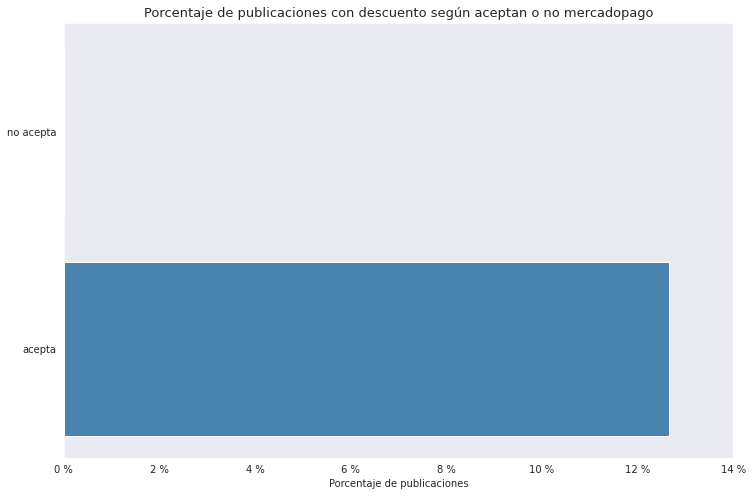

In [258]:
sns.barplot(data = df_aux, x = "porcentaje", y = "acepta mercadopago", orient = "h", palette = 'Blues')

xticks = np.arange(0, 15, 2)
plt.xticks(xticks, [str(int(item)) + " %" for item in xticks])

plt.title(u"Porcentaje de publicaciones con descuento según aceptan o no mercadopago", fontsize = 13)
plt.xlabel("Porcentaje de publicaciones", fontsize = 10)
plt.ylabel("")
plt.show()

In [106]:
print("Categorías que no aceptan mercadopago:")
df_total[df_total["accepts_mercadopago"] == 0]["categoria_principal"].value_counts()

Categorías que no aceptan mercadopago:


Inmuebles    997
Name: categoria_principal, dtype: int64

Como puede verse en el gráfico, todas las publicaciones con descuento aceptan mercadopago, como así también todas las categorías presentes a excepción de la que involucra a inmuebles. Teniendo en cuenta lo analizado anteriormente, la categoría que involucra a vehículos, la cual no presenta descuentos, también acepta mercadopago, lo cual fue contrario a lo que se suponía. 

## ¿Hay alguna relación entre las publicaciones con descuento y el envío gratis?

In [239]:
df_aux = df_total.groupby(by = 'shipping__free_shipping')['tiene_descuento'].mean() * 100
df_aux = pd.DataFrame(df_aux).reset_index()
df_aux.rename(columns = {'shipping__free_shipping':'envío gratis',
                         'tiene_descuento':'porcentaje'}, inplace = True)
#df_aux = df_aux.sort_values(by = 'porcentaje', ascending = False)
df_aux.replace({0:"no acepta", 1:"acepta"}, inplace = True)

In [240]:
df_aux

,envío gratis,porcentaje
0,no acepta,10.396318
1,acepta,14.660912


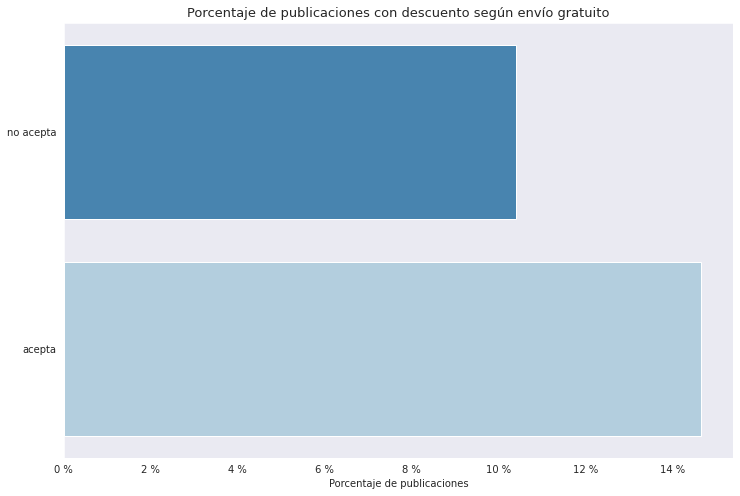

In [241]:
sns.barplot(data = df_aux, x = "porcentaje", y = "envío gratis", orient = "h", palette = 'Blues_r')

xticks = np.arange(0, 15, 2)
plt.xticks(xticks, [str(int(item)) + " %" for item in xticks])

plt.title(u"Porcentaje de publicaciones con descuento según envío gratuito", fontsize = 13)
plt.xlabel("Porcentaje de publicaciones", fontsize = 10)
plt.ylabel("")
plt.show()

Si bien el gráfico muestra que hay una ligera cantidad mayor de publicaciones con descuento que están asociadas a publicaciones que presentan envíos gratuitos, no sería correcto concluir que esto efectivamente es así, dado la cantidad de datos con la cual se está trabajando.

## ¿Hay alguna relación entre las publicaciones con descuento y el retiro por local?

In [242]:
df_aux = df_total.groupby(by = 'shipping__store_pick_up')['tiene_descuento'].mean() * 100
df_aux = pd.DataFrame(df_aux).reset_index()
df_aux.rename(columns = {'shipping__store_pick_up':'retiro por local',
                         'tiene_descuento':'porcentaje'}, inplace = True)
#df_aux = df_aux.sort_values(by = 'porcentaje', ascending = False)
df_aux.replace({0:"no acepta", 1:"acepta"}, inplace = True)

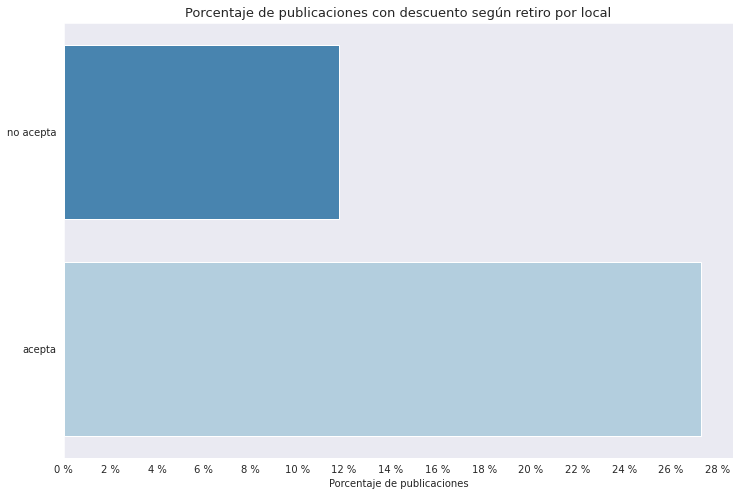

In [243]:
sns.barplot(data = df_aux, x = "porcentaje", y = "retiro por local", orient = "h", palette = 'Blues_r')

xticks = np.arange(0, 30, 2)
plt.xticks(xticks, [str(int(item)) + " %" for item in xticks])

plt.title(u"Porcentaje de publicaciones con descuento según retiro por local", fontsize = 13)
plt.xlabel("Porcentaje de publicaciones", fontsize = 10)
plt.ylabel("")
plt.show()

A simple vista se puede observar que las publicaciones con descuento asociadas al retiro por local superan el doble cuando la publicación no tiene este modo de retiro. Sin embargo, se debería analizar si este patrón se sigue cumpliendo en un dataset más representativo.

## ¿Cuáles son las categorías favoritas para comprar con descuento?

In [244]:
(df_total[df_total.tiene_descuento == 1].groupby('categoria_principal')['sold_quantity']).sum().sort_values(ascending = False)

categoria_principal
Hogar, Muebles y Jardín          345262
Alimentos y Bebidas              300835
Deportes y Fitness               253669
Salud y Equipamiento Médico      209393
Belleza y Cuidado Personal       200932
Industrias y Oficinas            189115
Herramientas                     149766
Electrónica, Audio y Video       133342
Ropa y Accesorios                114038
Accesorios para Vehículos         92201
Electrodomésticos y Aires Ac.     92140
Construcción                      76023
Agro                              72877
Joyas y Relojes                   56431
Juegos y Juguetes                 54579
Bebés                             50497
Computación                       48558
Celulares y Teléfonos             46953
Cámaras y Accesorios              37055
Otras categorías                  35260
Instrumentos Musicales            31873
Consolas y Videojuegos            29824
Animales y Mascotas               29267
Arte, Librería y Mercería         18500
Libros, Revistas y C

Se puede observar que las ventas históricas de celulares y teléfonos y computación no se encuentran entre las primeras posiciones, lo cual fue contrario a lo que se pensaba. Mientras que las ventas correspondientes a la categoría de Salud y Equipamiento Médico se encuentran dentro del top 5 de ventas, lo cual fue una sorpresa también. Investigando un poco más en el MarketPlace se vio que los descuentos aplicados a la parte de equipamiento médico se dan mayormente en oxímetros de pulso para dedo, pero no en equipamiento médico con una complejidad mayor, despejando las dudas que se tenían.

In [289]:
df_aux = (df_total[df_total.tiene_descuento == 1].groupby('categoria_principal')['sold_quantity']).sum().sort_values(ascending = False)
df_aux = pd.DataFrame(df_aux).reset_index()
df_aux.rename(columns = {'categoria_principal':'Categoría',
                         'sold_quantity':'Cantidad vendida'}, inplace = True)

In [ ]:
#df_aux = df_aux.sort_values(by = 'porcentaje', ascending = False)

In [290]:
df_aux

,Categoría,Cantidad vendida
0,"Hogar, Muebles y Jardín",345262
1,Alimentos y Bebidas,300835
2,Deportes y Fitness,253669
3,Salud y Equipamiento Médico,209393
4,Belleza y Cuidado Personal,200932
5,Industrias y Oficinas,189115
6,Herramientas,149766
7,"Electrónica, Audio y Video",133342
8,Ropa y Accesorios,114038
9,Accesorios para Vehículos,92201


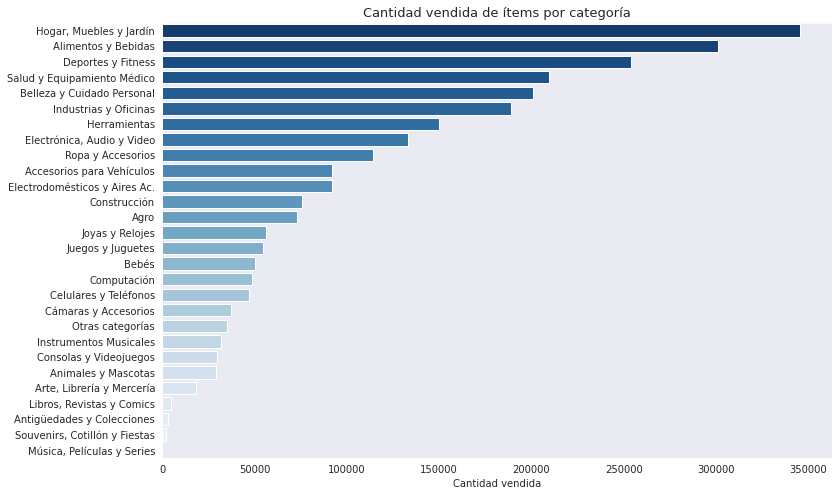

In [291]:
sns.barplot(data = df_aux, x = "Cantidad vendida", y = "Categoría", orient = "h", palette = 'Blues_r')

#xticks = np.arange(0, 15, 2)
#plt.xticks(xticks, [str(int(item)) + " %" for item in xticks])

plt.title(u"Cantidad vendida de ítems por categoría", fontsize = 13)
plt.xlabel("Cantidad vendida", fontsize = 10)
plt.ylabel("")
plt.show()